In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Now we have to load the irish dataset with the help of sklearn

In [3]:
from sklearn.datasets import load_iris
iris=load_iris()

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)

In [7]:
df.head(8)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2


In [8]:
df['target']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
df['target==1']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target==1
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


In [10]:
df['target==2']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target==1,target==2
0,5.1,3.5,1.4,0.2,0,0,0
1,4.9,3.0,1.4,0.2,0,0,0
2,4.7,3.2,1.3,0.2,0,0,0
3,4.6,3.1,1.5,0.2,0,0,0
4,5.0,3.6,1.4,0.2,0,0,0


In [11]:
df['flower_name']=df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target==1,target==2,flower_name
0,5.1,3.5,1.4,0.2,0,0,0,setosa
1,4.9,3.0,1.4,0.2,0,0,0,setosa
2,4.7,3.2,1.3,0.2,0,0,0,setosa
3,4.6,3.1,1.5,0.2,0,0,0,setosa
4,5.0,3.6,1.4,0.2,0,0,0,setosa


In [12]:
df0=df[:50]
df1=df[50:100]
df2=df[100:150]

In [13]:
%matplotlib inline

C:\Users\Tushar\AppData\Local\Temp\ipykernel_1740\22286411.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


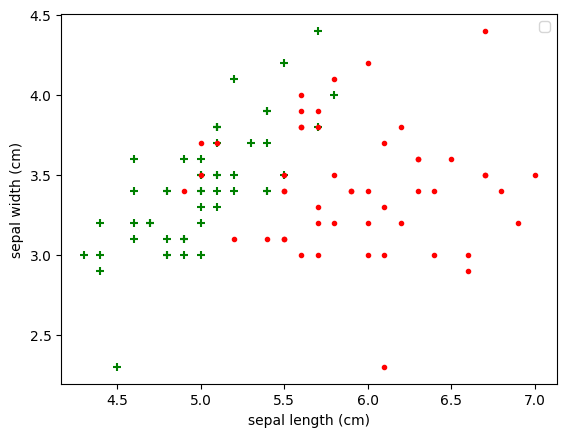

In [14]:
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color="green",marker="+")
plt.scatter(df1['sepal length (cm)'],df0['sepal width (cm)'],color="red",marker=".")
plt.legend()
plt.show()

C:\Users\Tushar\AppData\Local\Temp\ipykernel_1740\3689868415.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


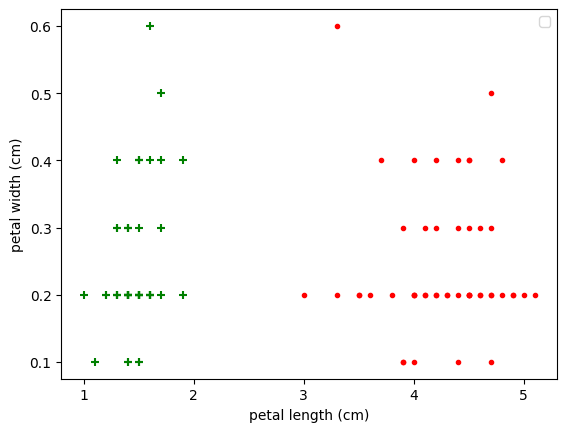

In [15]:
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color="green",marker="+")
plt.scatter(df1['petal length (cm)'],df0['petal width (cm)'],color="red",marker=".")
plt.legend()
plt.show()

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x=df.drop(['target','flower_name'],axis='columns')
y=df.target

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [19]:
len(x_train)

120

In [20]:
len(x_test)

30

In [21]:
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier(n_neighbors=5)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [22]:
knn=KNeighborsClassifier(n_neighbors=5)

In [23]:
knn.fit(x_train,y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [24]:
knn.score(x_test,y_test)

1.0

In [37]:
from sklearn.metrics import confusion_matrix
y_pred=knn.predict(x_test)
cm=confusion_matrix(y_test,y_pred)

In [38]:
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

Text(50.722222222222214, 0.5, 'Truth')

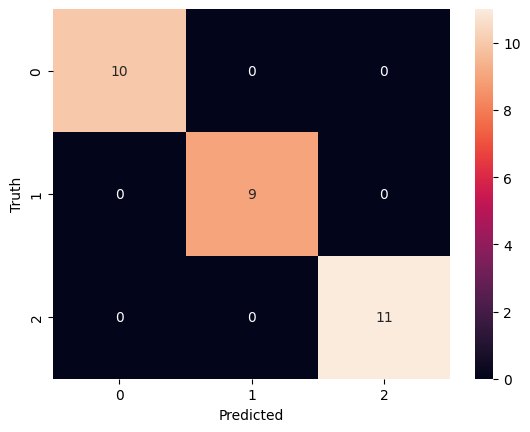

In [41]:
plt.figure(figure=(7,5))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
# plt.show()